In [2]:
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [3]:
model = load_model('/Users/nandhinee_pr/sign/Model.H5')

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 16)        1216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              513000    
_________________________________________________________________
dense_4 (Dense)              (None, 25)                25025     
Total para

In [5]:
cap = cv2.VideoCapture(0)
while(True):
    ret, frame = cap.read()
    cvt = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.rectangle(frame, (200, 200), (500, 500), (255,0,0), 5)
    cvt = cvt[200:500, 200:500]
    
    cvt = cv2.resize(cvt, (28,28))
    cvt = cv2.cvtColor(cvt, cv2.COLOR_GRAY2BGR)
    
    ar = np.array(cvt).reshape((28,28,3))
    ar = np.expand_dims(ar, axis=0)
    prediction = model.predict(ar)[0]
    
    j = "-"
    dict_pred = {'A': 0,
     'B': 1,
     'K': 2,
     'L': 3,
     'M': 4,
     'N': 5,
     'O': 6,
     'P': 7,
     'Q': 8,
     'R': 9,
     'S': 10,
     'T': 11,
     'C': 12,
     'U': 13,
     'V': 14,
     'W': 15,
     'X': 16,
     'Y': 17,
     'D': 18,
     'E': 19,
     'F': 20,
     'G': 21,
     'H': 22,
     'I': 23,
     '-': 24}
    
    for i in range(0, 25):
        if prediction[i]==1:
            j = list(dict_pred.keys())[list(dict_pred.values()).index(i)]

    cv2.putText(frame,j , (800, 200), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255),3 )
    cv2.imshow('cvt', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break        
cap.release()
cv2.destroyAllWindows()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-2698fac8e928>", line 49, in <module>
    if cv2.waitKey(1) & 0xFF == ord('q'):
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/anaconda3/lib/python3.5/site-packages/IPython/core/ultratb.py", line 1095, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/anaconda3/lib/python3.5/site-packages/IPython/core/ultratb.py

KeyboardInterrupt: 

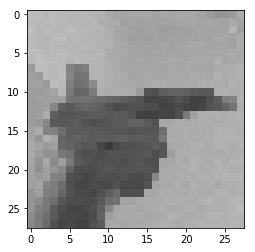

In [11]:
plt.imshow(cvt)